# Module 2 Numerical Integration (2 of n)


## Learning objectives

- improve the efficiency of our integration algorithms by using the trapezoid and Simpson's method
- utilize a published library to compute integrals

# Pre-class

* be ready to share your work on M2 ~~with your group~~, and discuss
* watch [Video 3.2](https://youtu.be/TzXShbDDE_o) (on log plots and exponents, will help with HW)
* read the text of this module, and be ready to ask questions and discuss the mathematics


## Group discussion: Numerical errors in integration methods 

Examine your work on previous HW problems: you should be able to observe that the errors in the left and right endpoint rules for numerical integration are proportional to $1/N$, where $N$ is the 
number of subintervals. The width of each subinterval is $h = (b-a)/N$, so we say the error in these methods "scales like" (is proportional to) $h$.

*If you don't observe this in your log-log plots .... ask an instructor ...*

Thus, if you want to reduce the error in a calculation by a factor of $10^6$, you must increase the number of subintervals 
by a factor of $10^6$. This requires $10^6$ times as many evaluations of the integrand $f(x)$. This might be fine for simple problems, 
with simple integrands. 
But for complicated integrands that require a lot of computer time to evaluate, this can be a problem. In those cases 
we need a more efficient integration scheme. 

The midpoint rule is better than the left or right endpoint rules; the errors in this method are proportional to $1/N^2$, 
or $h^2$. With the midpoint rule we can reduce the error by a factor of $10^6$ by increasing the number of subintervals 
by a factor of $1000$. This requires "only" $1000$ times as many evaluations of $f(x)$. 

Today, we'll find out: *can we do even better?* and what are the pros/cons of the different methods?



## Trapezoid rule

The errors for the left endpoint rule and the right endpoint rule are similar. To be precise, 
the order $h^2$ terms are the same apart from the overall sign, and the point of evaluation of $f''(x)$. The point of evaluation should 
not make much difference, assuming $h$ is small. This suggests that the errors in the left and right endpoint rules should be
approximately equal in magnitude but opposite in sign.  You might have noticed this from working with the 
left and right endpoint rules in the previous lesson. 

This observation leads us to the trapezoid rule for numerical integration. The trapezoid rule is obtained by 
taking the _average_ of the left and right endpoint rules. That is, we approximate the integral 

$$
	I = \int_a^b f(x)\,dx
$$

by 

$$
	I_T = \frac{1}{2} \left( I_L + I_R\right) = \sum_{i=0}^{N-1} \frac{1}{2} \left[ f(a + ih) + f(a + ih + h) \right] h
$$

![Integration trapezoids](https://upload.wikimedia.org/wikipedia/commons/a/a8/Calkowanie_numeryczne-metoda_trapezow.png)

Geometrically, the area for each subinterval is approximated as the area of a trapezoid that touches the curve $f(x)$ at both 
endpoints. Note that the trapezoid rule can be rearranged in this way:

$$
	I_T = \frac{h}{2}\left[ f(a) + f(b)\right] + \sum_{i=1}^{N-1} f(a+ih) h
$$

This result is important because it shows that the trapezoid rule requires only $N+1$ evaluations of the function $f(x)$. This is essentially the same as the number of evaluations required for the left endpoint, right endpoint, and midpoint rules, 
namely $N$. 

**Note:** In the second version, can you see how the $i=0$ and $i=N-1$ contributions to the sum are moved out of the sum? 




## Homework 3.3 ($\LaTeX{}$)

Consider the integral

$$
	I = \int_{-1}^1 \cos(x^2 - x) \, dx
$$

For the left endpoint rule, midpoint rule, and trapezoid rule, find (approximately) the number 
of subintervals required to achieve an error of about $\pm 10^{-4}$. In each case, how many function evaluations 
are required? 

In [1]:
import pandas as pd
import numpy as np

Nlist = [2,4,8,16,32,64,128,256,512,1024, 1100, 5000, 6000, 7000]

# Midpoint function: Looks at the center point in each subintevral and multiplies that by the height to calculate integration.
def midpoint(f,a,b,N):
    h = (b - a) / N
    
    my_sum = 0

    # Compute the sum somehow.  Maybe one of the loops above?
    for i in range(N):
        my_sum = my_sum + f((a + (i + 1/2)*h)**2 - (a + (i+1/2)*h)) * h
    return my_sum


# Leftpoint function: Looks at the left point in each subintevral and multiplies that by the height to calculate integration.
def leftpoint(f,a,b,N):
    h = (b - a) / N # Height
    
    my_sum = 0

    # Compute the sum using left point of subinterval. 
    for i in range(N):
        my_sum = my_sum + f((a + i*h)**2 - (a + i*h)) * h
    

    return my_sum   # Note that we need this to tell the code outside of the function about the result


# Trapezoid function: Average of leftpoint and rightpoint of interval to approximate the intergation. 
# Similar as previous methods with multiplication of height.
def trappoint(f, a, b, N):
    h = (b - a) / N

    my_sum = 0

    for i in range(N):
        my_sum = my_sum + (1 / 2) * h * (f((a + i * h) ** 2 - (a + i * h)) + f((a + i * h + h) ** 2 - (a + i * h + h)))

    return my_sum


# Approximator: Cycles through numbers to find approximately how many subintevrals are required to get within a certain error tolerance.
def approximator(model, sig, n, true_value):
    para = False
    call_time = 0 # Count number of times something is called (repeated loop)

    # Checks difference between values and if the difference is not met, it continues on. 
    while para == False:
        n += 10
        curr_value = model(np.cos, -1, 1, n)
        difference = abs(curr_value - true_value)
        relative_error = difference / true_value

        call_time += 1
        if relative_error < sig:
            if(model == midpoint):
                print("\n---The current method is the middle point---")
            elif(model == leftpoint):
                print("\n---The current method is the left point---")
            else:
                print("\n---The current method is the trapezoid point---")
            print("The number of subintervals within the error tolerance is", n, "with a relative error", relative_error, ".")
            print("The approximated current value is", curr_value)
            print("The number of times this method was called is", call_time)
            para = True
    


# ----- For 10^-4 sigfigs -----


sigfig_value = 0.00005 # Change to find what degree you want your value to be correct
true_value = 1.5554701650 # Approximated with N = 500000

approximator(midpoint, sigfig_value, 0, true_value) # midpoint method
approximator(leftpoint, sigfig_value, 0, true_value) # leftpoint
approximator(trappoint, sigfig_value, 0, true_value) # trapezoid 




---The current method is the middle point---
The number of subintervals within the error tolerance is 80 with a relative error 4.5678358334817675e-05 .
The approximated current value is 1.555541216323576
The number of times this method was called is 8

---The current method is the left point---
The number of subintervals within the error tolerance is 18210 with a relative error 4.9997860836490337e-05 .
The approximated current value is 1.555392394819155
The number of times this method was called is 1821

---The current method is the trapezoid point---
The number of subintervals within the error tolerance is 110 with a relative error 4.831491126745926e-05 .
The approximated current value is 1.5553950125969989
The number of times this method was called is 11


## Simpson's Rule

We have now identified two integration methods with errors (per subinterval) of order $h^3$. The midpoint rule has error 
${\cal E}_M$ in each subinterval. The trapezoid rule has error ${\cal E}_T$
in each subinterval. 
Some math would show that to leading order, ${\cal E}_T = -2{\cal E}_M$. This suggests 
that we can define a new integration method as a weighted sum of the midpoint and trapezoid rules, designed 
to cancel the order $h^3$ terms in the error. This leads to *Simpson's rule*:

$$
	I_S = \frac{1}{3} I_T + \frac{2}{3} I_M
$$

which can be written explicitly as

$$
	I_S = \frac{h}{6}\left\{ f(a) + f(b) + 2\sum_{i=1}^{N-1} f(a + ih) + 4\sum_{i=1}^N f(a+ih - h/2) \right\}
$$

Note that for implementation purposes, you could simply call the trapezoid and midpoint functions you've already written.

For Simpson's rule, the errors of order $h^3$ from the midpoint and trapezoid rules cancel. A complete analysis 
shows that the order $h^4$ terms in the error actually vanish as well. The leading non--zero term in the error is proportional 
to $h^5$. That is, for Simpson's rule, the error in each 
subinterval is order $h^5$. The total error for $N\sim 1/h$ subintervals 
is proportional to $Nh^5 \sim h^4$. 

Geometrically, Simpson's rule is obtained by approximating the area in each subinterval as the area under 
a parabola that matches the function $f(x)$ at each endpoint and at the midpoint. 
Simpson's rule is more efficient than any of the other integration methods we have discussed. If we want to reduce 
the error by a factor of $10^6$, we must increase the number of subintervals by a factor of 
$10^{6/4}\approx 32$. Note that Simpson's rule requires $2N + 1$ function evaluations. This is roughly twice as 
many evaluations as our other methods. However, the rapid reduction of error with a relatively small increase in $N$ 
will usually offset the extra function calls.  

# Homework

The error function is defined by 

$$
	{\rm erf}(x) \equiv \frac{2}{\sqrt{\pi}} \int_0^x e^{-t^2} dt
$$

### a) Write a function `SimpErf` to evaluate the error function using Simpson's rule

- Input: x
- Output: the right hand side of the equation above

Hint: for each value $0 \le x \le 3$,  you will need to evaluate the integral over $t$.

In [ ]:
import pandas as pd
import numpy as np

# Note: I realized only after I finished I could have made these midpoint and trapopoint functions easier on myself,
# by not defining it in terms of the function inside of the definition and instead passing the function like i did for np.exp.
# However, this way still works but is much more convoluted.

# Midpoint function: Looks at the center point in each subintevral and multiplies that by the height to calculate integration.
def midpoint(f,a,b,N):
    h = (b - a) / N
    
    my_sum = 0

    # Compute the sum somehow.  Maybe one of the loops above?
    for i in range(N):
        my_sum += (2 / np.sqrt(np.pi)) * f(-(a + (i + 1/2)*h)**2) * h
    return my_sum


# Trapezoid function: Average of leftpoint and rightpoint of interval to approximate the intergation. 
# Similar as previous methods with multiplication of height.
def trappoint(f, a, b, N):
    h = (b - a) / N

    my_sum = 0

    for i in range(N):
        my_sum += (1 / 2) * h * (2 / np.sqrt(np.pi)) * (f(-(a + i * h) ** 2) + f(-(a + i * h + h) ** 2))

    return my_sum


def Simp(f, a , b , N):
    return (1/3) * trappoint(f, a, b, N) + (2/3) * midpoint(f, a, b, N)


# Approximator: Cycles through numbers to find approximately how many subintevrals are required to get within a certain error tolerance.
def approximator(model, sig, n, true_value):
    para = False
    call_time = 0 # Count number of times something is called (repeated loop)

    # Checks difference between values and if the difference is not met, it continues on. 
    while para == False:
        n = n*2
        curr_value = model(np.exp, 0, 3, n)
        difference = abs(curr_value - true_value)
        relative_error = difference / true_value

        call_time += 1
        if relative_error < sig:
            if(model == midpoint):
                print("\n---The current method is the middle point---")
                print("The number of times this method was called is", call_time)
            elif(model == trappoint):
                print("\n---The current method is the trap point---")
                print("The number of times this method was called is", call_time)
            else:
                print("\n---The current method is Simpson's rule---")
                print("The number of times this method was called is", call_time, "with two functions called each time.") # Since it calls both functions
            
            print("The number of subintervals within the error tolerance is", n, "with a relative error", relative_error, ".")
            print("The approximated current value is", curr_value)
        
            para = True
    


# ----- For 10^-4 sigfigs -----


sigfig_value = 0.000005 # Change to find what degree you want your value to be correct
true_value = 0.9999779095030014 # For range 0 to 3 which will be our test

# Conducting test on 0 to 3, can change 3 to another value to make it generic x
approximator(trappoint, sigfig_value, 1, true_value)
approximator(midpoint, sigfig_value, 1, true_value)
approximator(Simp, sigfig_value, 1, true_value) # Simpson's rule


---The current method is the trap point---
The number of times this method was called is 4
The number of subintervals within the error tolerance is 16 with a relative error 2.4055894549205206e-06 .
The approximated current value is 0.9999755039666871

---The current method is the middle point---
The number of times this method was called is 3
The number of subintervals within the error tolerance is 8 with a relative error 4.33885946039414e-06 .
The approximated current value is 0.9999822482666142

---The current method is Simpson's rule---
The number of times this method was called is 2 with two functions called each time.
The number of subintervals within the error tolerance is 4 with a relative error 1.951869085052761e-06 .
The approximated current value is 0.9999759576770341


### b) Make a labelled plot of ${\rm erf}(x)$ versus $x$ for $0 \le x \le 3$.

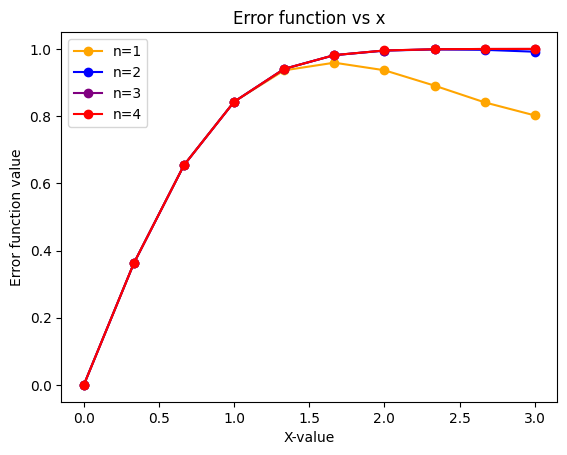

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Calls one of the previous methods to calculate integration sum. Needs the array of values its checking (x) and n (number of subintevrals).
def caller(model, x, n):
    y_vals = np.zeros(len(x))
    for i in range(len(x)):
        y_vals[i] = model(np.exp, 0, x[i], n)
    
    return y_vals

end_point = 3
x_array = np.linspace(0, end_point, 10)

# See how n changes the approximation-->improves with more values
y_array_1 = caller(Simp, x_array, 1)
y_array_2 = caller(Simp, x_array, 2)
y_array_3 = caller(Simp, x_array, 3)
y_array_4 = caller(Simp, x_array, 4)


plt.plot(x_array, y_array_1, 'o-', color='orange', label="n=1")
plt.plot(x_array, y_array_2, 'o-', color='blue', label="n=2")
plt.plot(x_array, y_array_3, 'o-', color='purple', label="n=3")
plt.plot(x_array, y_array_4, 'o-', color='red', label="n=4")
plt.xlabel('X-value')
plt.ylabel('Error function value')
plt.legend()
plt.title("Error function vs x")
plt.show()

### c) Using `scipy.integrate`

Fortunately, people have been working on numerical integration for a long time and have several more advanced methods.  Often, it's not worth reinventing the wheel, and it's better to simply call an already written _library_ function.  In scipy, we can use the `quad` function for this -- it's found in the `scipy.integrate` module.

- https://docs.scipy.org/doc/scipy/reference/integrate.html
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html#scipy.integrate.quad

In the simplest form, it takes a function and the limits as arguments:

    from scipy.integrate import quad

    answer = quad(f, a, b)
    
`a` and `b` are numbers, and `f` is a function (either one that you define, or one that is already defined. It returns the answer, and an estimate of what the error in the answer is.

Define two functions: function `Sq` that returns the square of input $x$ and function `SqInt` that computes the integral of $x^2$ from $a$ to $b$ using the `Sq` and the `quad` function. This problem will be autograded by nbgrader.

**Bonus Challenge:** can you make it so that each function has only a `def` line and a `return` line?

In [27]:
from scipy.integrate import quad

# Sq: Returns sqaure of input x 
def Sq(x):
    return (x)**2


def erf(x):
    return (2/np.sqrt(np.pi)) * np.exp(-Sq(x))


# SqInt: Computes integral of x^2 from a to b using Sq and quad function
def SqInt(f, a, b):
    return quad(f, a, b)


a = 0
b = 3
answer = SqInt(Sq, a, b) # Returns tuple of answer and error, just look at first value
print("The integration of x^2 is estimated to be", answer[0], "with error", answer[1], "on integrands", a, "to", b)
print("Thus, this is approximately", round(answer[0], 4))

answer = SqInt(erf, a, b)
print("For the same bounds but with the erf(x) function, we have", answer[0], "with error", answer[1])



The integration of x^2 is estimated to be 9.000000000000002 with error 9.992007221626411e-14 on integrands 0 to 3
Thus, this is approximately 9.0
For the same bounds but with the erf(x) function, we have 0.9999779095030012 with error 3.5846608488908304e-11
